# Import Libraries

In [382]:
%matplotlib notebook

In [383]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data Loading 

In [384]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

In [385]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [386]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [387]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [388]:
# Checking the number of mice.
number_of_mice = mouse_data_complete["Mouse ID"].count()
number_of_mice

1893

In [389]:
mouse_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [390]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [391]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], ignore_index=True)
mouse_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [392]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = mouse_data_cleaned["Mouse ID"].count()
number_of_mice_cleaned

1888

## Summary Statistics

In [393]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_summary = mouse_data_cleaned.groupby(['Drug Regimen'])
drug_regimen_df = drug_regimen_summary.sum()
drug_regimen_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,3095,4592,4960,9355.420462,164
Ceftamin,2358,4877,3515,9361.228582,210
Infubinol,2889,4841,3235,9413.493529,171
Ketapril,2944,5238,3705,10384.299876,244
Naftisol,2232,5053,3650,10105.671026,220
Placebo,1943,5055,3380,9780.078122,261
Propriva,1649,4224,2665,8173.380288,156
Ramicane,2436,4487,4885,9169.417875,125
Stelasyn,2314,5042,3480,9816.199991,158


In [394]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#mean
drug_regimen_mean = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#median
drug_regimen_median = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#variance 
drug_regimen_var = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#standard deviation
drug_regimen_std = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#SEM
drug_regimen_SEM = mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [395]:
#Assemble the resulting series into a single summary dataframe.
drug_regimen_df['Mean']=drug_regimen_mean
drug_regimen_df['Median']=drug_regimen_median
drug_regimen_df['Variance']= drug_regimen_var
drug_regimen_df['Standard Deviation']= drug_regimen_std
drug_regimen_df['SEM']= drug_regimen_SEM

drug_regimen_final = drug_regimen_df.drop(columns=['Age_months', 'Weight (g)', 'Timepoint', 
                                                   'Tumor Volume (mm3)', 'Metastatic Sites'])

drug_regimen_final['Mean'] = drug_regimen_final['Mean'].map("{:.3f}".format)
drug_regimen_final['Median'] = drug_regimen_final['Median'].map("{:.3f}".format)
drug_regimen_final['Variance'] = drug_regimen_final['Variance'].map("{:.3f}".format)
drug_regimen_final['Standard Deviation'] = drug_regimen_final['Standard Deviation'].map("{:.3f}".format)
drug_regimen_final['SEM'] = drug_regimen_final['SEM'].map("{:.3f}".format)

drug_regimen_final

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [397]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line

agg_method = (mouse_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean', 'mean'),('Median', 'median'),
                                                              ('Variance', 'var'), ('Standard Deviation', 'std'),
                                                               ('SEM', 'sem')]))

agg_method['Mean'] = agg_method['Mean'].map("{:.3f}".format)
agg_method['Median'] = agg_method['Median'].map("{:.3f}".format)
agg_method['Variance'] = agg_method['Variance'].map("{:.3f}".format)
agg_method['Standard Deviation'] = agg_method['Standard Deviation'].map("{:.3f}".format)
agg_method['SEM'] = agg_method['SEM'].map("{:.3f}".format)

agg_method

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


##  Bar and Pie Charts

<IPython.core.display.Javascript object>


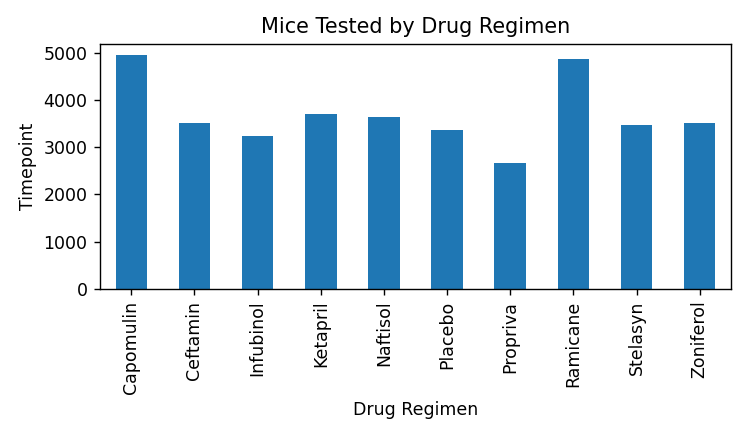

In [432]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_summary = mouse_data_cleaned.groupby(['Drug Regimen'])
Timepoint_df = drug_regimen_summary['Timepoint'].sum()
Timepoint_df

# Create a bar chart based off of the group 
timepoint_chart = Timepoint_df.plot(kind='bar', figsize=(6,3.5), title = 'Mice Tested by Drug Regimen')

# Set the xlabel and ylabel using class methods
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Timepoint")

plt.tight_layout()

<IPython.core.display.Javascript object>


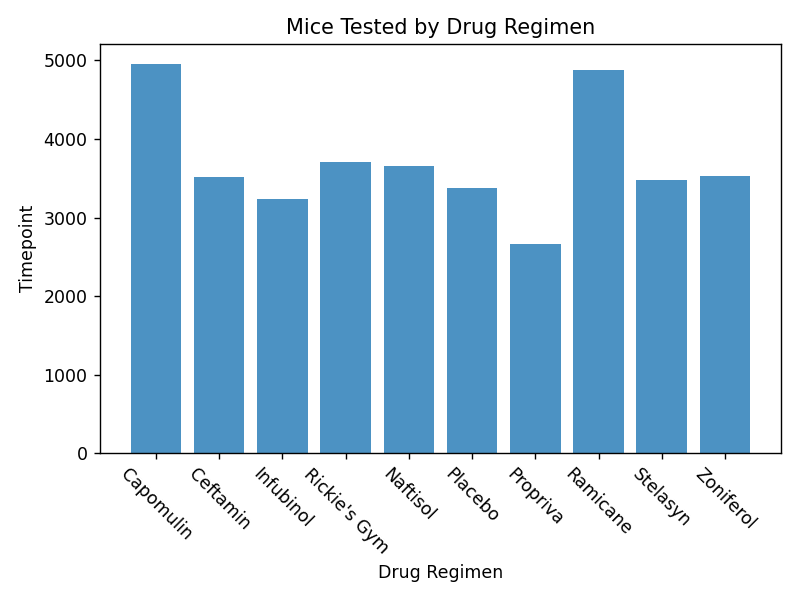

In [431]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Characterize the data set using matplotlib

Drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Rickie's Gym", "Naftisol",
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
Timepoint = [4960, 3515, 3235, 3705, 3650, 3380, 2665, 4885, 3480, 3525]
x_axis =np.arange(0, len(Drug_regimen))
plt.bar(x_axis, Timepoint, alpha = 0.8, align = 'center')
plt.title('Mice Tested by Drug Regimen')
plt.xlabel ('Drug Regimen')
plt.ylabel ('Timepoint')
tick_location = [value for value in x_axis]
plt.xticks (tick_location, Drug_regimen, rotation = -45)
plt.tight_layout()

<IPython.core.display.Javascript object>


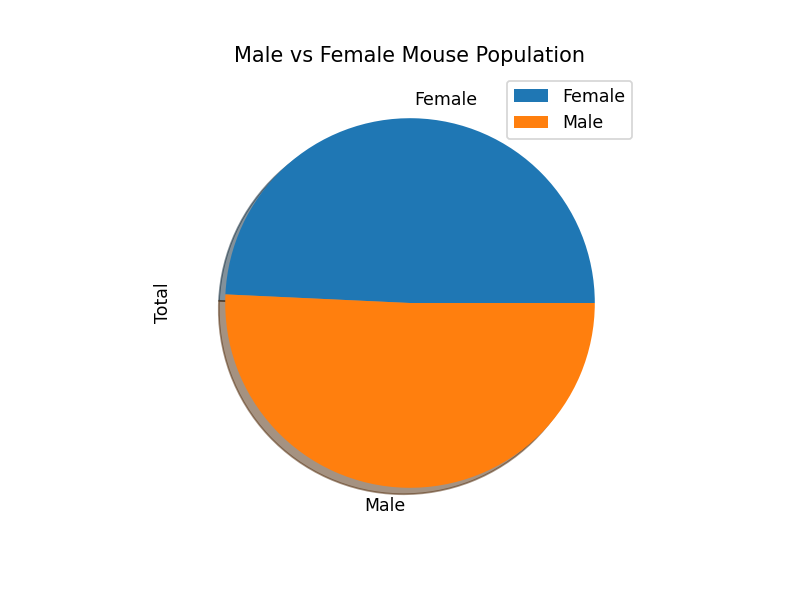

<AxesSubplot:title={'center':'Male vs Female Mouse Population'}, ylabel='Total'>

In [430]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = mouse_data_cleaned.groupby(["Sex"]).sum()
sex_df2 = pd.DataFrame({"Sex": ["Male", "Female"], "Total": [958, 930]})
sex_df2

sex_df2.groupby(['Sex']).sum().plot(kind='pie', y='Total', shadow=True, 
                                    title = 'Male vs Female Mouse Population' )

<IPython.core.display.Javascript object>


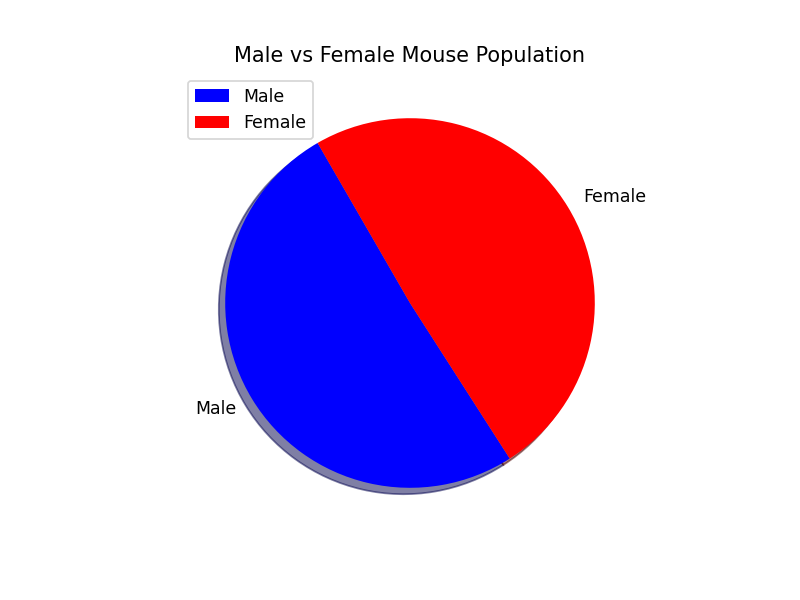

In [427]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Male vs Female Mouse Population')
labels = ["Male", "Female"]
Total = [958, 930]
x_axis = np.arange(0, len(Sex))
colors = ["blue", "red"]
explode = (0, 0)
plt.pie(Total, explode=explode, labels=labels, colors=colors, shadow=True, startangle=120)
plt.legend()

##  Quartiles, Outliers and Boxplots

In [403]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [404]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = mouse_data_complete.drop_duplicates(['Mouse ID'], keep='last', ignore_index=True)
tumor_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [405]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_sort_df = tumor_vol_df[tumor_vol_df["Drug Regimen"].str.contains
                               ("Ketapril|Naftisol|Placebo|Propriva|Stelasyn|Zoniferol") == False]

regimen_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [406]:
Capo_sort_df = regimen_sort_df[regimen_sort_df["Drug Regimen"].str.contains
                               ("Ramicane|Infubinol|Ceftamin") == False]
Capo_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3


In [407]:
Capomulin = Capo_sort_df['Tumor Volume (mm3)'].tolist()

In [408]:
Rami_sort_df = regimen_sort_df[regimen_sort_df["Drug Regimen"].str.contains
                               ("Capomulin|Infubinol|Ceftamin") == False]
Rami_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0


In [409]:
Ramicane = Rami_sort_df['Tumor Volume (mm3)'].tolist()

In [410]:
Infu_sort_df = regimen_sort_df[regimen_sort_df["Drug Regimen"].str.contains
                               ("Capomulin|Ramicane|Ceftamin") == False]
Infu_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
57,a577,Infubinol,Female,6,25,30,57.031862,2
58,a685,Infubinol,Male,8,30,45,66.083066,3
70,c139,Infubinol,Male,11,28,45,72.226731,2


In [411]:
Infubinol = Infu_sort_df['Tumor Volume (mm3)'].tolist()

In [412]:
Ceft_sort_df = regimen_sort_df[regimen_sort_df["Drug Regimen"].str.contains
                               ("Capomulin|Ramicane|Infubinol") == False]
Ceft_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
52,a275,Ceftamin,Female,20,28,45,62.999356,3
65,b447,Ceftamin,Male,2,30,0,45.000000,0
66,b487,Ceftamin,Female,6,28,25,56.057749,1
68,b759,Ceftamin,Female,12,25,30,55.742829,1
97,f436,Ceftamin,Female,3,25,15,48.722078,2


In [413]:
Ceftamin = Ceft_sort_df['Tumor Volume (mm3)'].tolist()

In [414]:
# Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = Capo_sort_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Capomulin")
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin
The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [415]:
# Ramicane
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = Rami_sort_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ramicane")
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [416]:
#Infubinol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = Infu_sort_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Infubinol")
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [417]:
#Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = Ceft_sort_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ceftamin")
print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


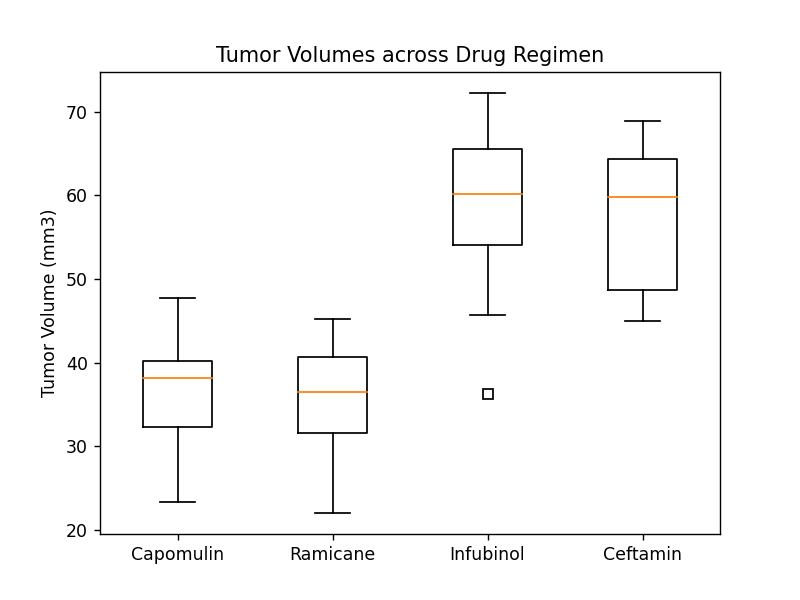

In [418]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin, Ramicane, Infubinol, Ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes across Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, showfliers=True, flierprops = {'marker': "s"})
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [419]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data_complete.head()
mouse_s185_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "s185", 
                                        ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
mouse_s185_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,Capomulin,0,45.000000
11,Capomulin,5,43.878496
12,Capomulin,10,37.614948
13,Capomulin,15,38.177232
14,Capomulin,20,36.866876
15,Capomulin,25,33.949940
16,Capomulin,30,32.959671
17,Capomulin,35,28.328531
18,Capomulin,40,25.472143
19,Capomulin,45,23.343598


<IPython.core.display.Javascript object>


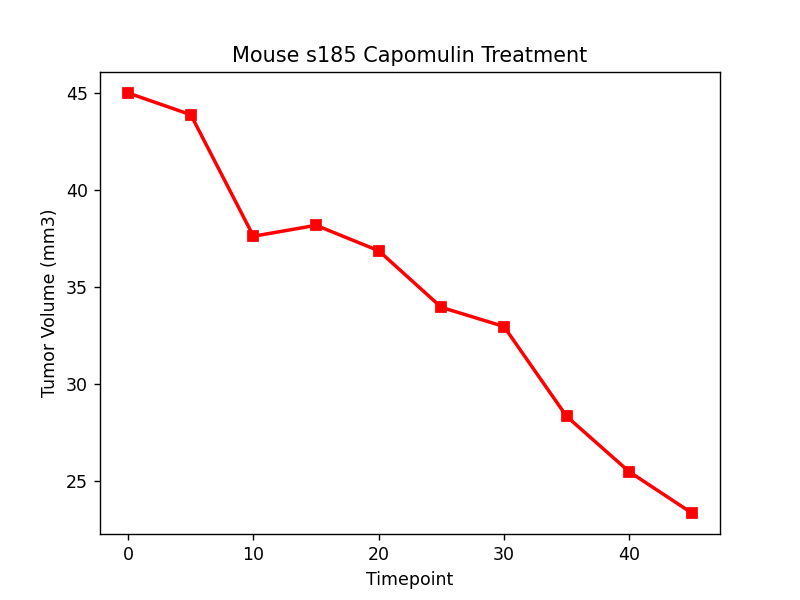

Text(0, 0.5, 'Tumor Volume (mm3)')

In [420]:
x_axis = mouse_s185_df['Timepoint']
tumor_vol = mouse_s185_df['Tumor Volume (mm3)']
plt.plot(x_axis, tumor_vol, marker = "s",color = 'red', linewidth = 2)
plt.title('Mouse s185 Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


In [421]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_data_complete.head()
Capomulin_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin", 
                                        ["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
10,s185,Capomulin,17,45.000000
11,s185,Capomulin,17,43.878496
12,s185,Capomulin,17,37.614948
13,s185,Capomulin,17,38.177232
14,s185,Capomulin,17,36.866876


In [422]:
tumor_average = Capomulin_df.groupby(['Mouse ID'])
tumor_average_df = tumor_average.mean()
tumor_average_df.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


<IPython.core.display.Javascript object>


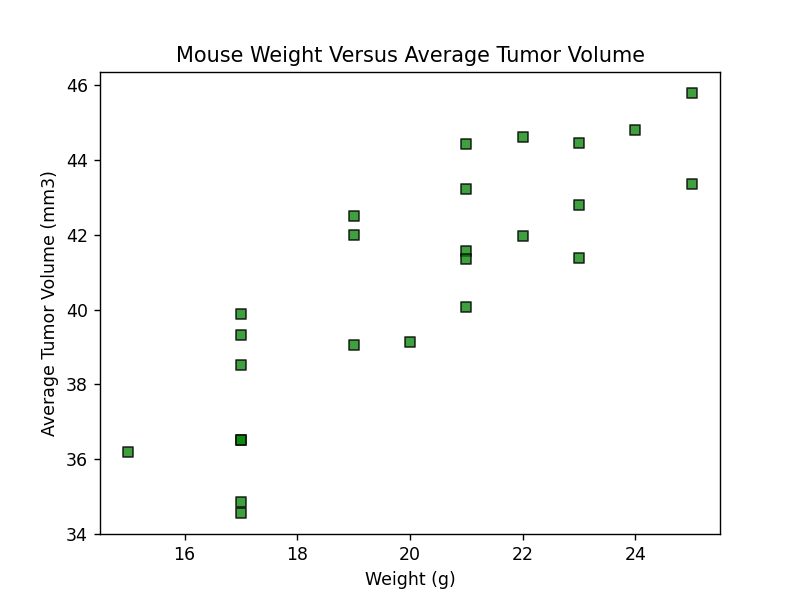

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [423]:
x_axis = tumor_average_df['Weight (g)']
tumor  = tumor_average_df['Tumor Volume (mm3)']
plt.scatter(x_axis, tumor, marker="s", facecolors="green", edgecolors="black", alpha=0.75)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [424]:
weight = tumor_average_df.iloc[:,0]
Tumor_ave = tumor_average_df.iloc[:,1]
correlation = st.pearsonr(weight,Tumor_ave)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


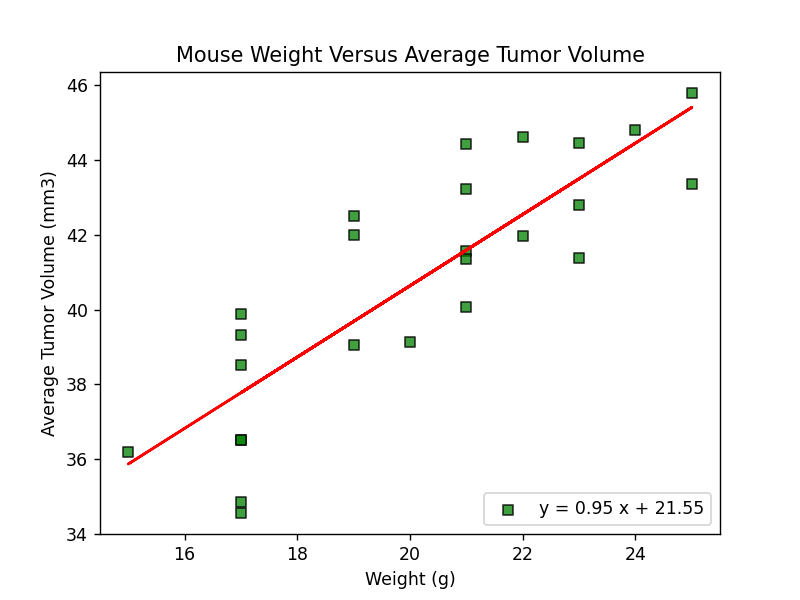

The r-squared is: 0.7088568047708723


In [426]:
# Add the linear regression equation and line to plot

x_values = tumor_average_df['Weight (g)']
y_values = tumor_average_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values, marker="s", facecolors="green", edgecolors="black", alpha=0.75, label = line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)',fontsize =10)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.legend(loc='lower right')